## GSAT trend patterns

In [1]:
# In[1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# %%
# define function
import src.SAT_function_Obs_Fingerprint as data_process
import src.Data_Preprocess as preprocess

In [2]:
# import src.slurm_cluster as scluster
# client, scluster = scluster.init_dask_slurm_cluster()

In [3]:
# load data
dir_in = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure1/data_revision/'
# Input the observational trend: original, forced and unforced
variable_name = ['60yr', '30yr', '10yr']
# Raw data
# HadCRUT5_Raw_trend_da = {}
# HadCRUT5_Raw_pvalue_da = {}
# for var in variable_name:
#     HadCRUT5_Raw_trend_da[var] = xr.open_dataarray(dir_in+'Raw_HadCRUT5_annual_'+var+'_trend.nc')
#     MMEM_Raw_pvalue_da[var] = xr.open_dataarray(dir_in+'Raw_MMEM_annual_'+var+'_p_value.nc')

# Forced data
"""
Dataset with the variable name:
    'MMEM',
    'CanESM5', 'IPSL-CM6A-LR', 
    'EC-Earth', 'ACCESS', 'MPI-ESM1-2-LR',
    'MIROC6'
"""
HadCRUT5_Forced_trend_da = {}
HadCRUT5_Forced_pvalue_da = {}
vars = ['MMEM', 'CanESM5', 'IPSL-CM6A-LR', 'EC-Earth', 'ACCESS', 'MPI-ESM1-2-LR', 'MIROC6']

for var in variable_name:
    HadCRUT5_Forced_trend_da[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_trend.nc')
    HadCRUT5_Forced_pvalue_da[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_p_value.nc')

# wrt CanESM5
HadCRUT5_Forced_trend_da_CanESM5 = {}
HadCRUT5_Forced_pvalue_da_CanESM5 = {}

for var in variable_name:
    HadCRUT5_Forced_trend_da_CanESM5[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_trend_CanESM5.nc')
    HadCRUT5_Forced_pvalue_da_CanESM5[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_p_value_CanESM5.nc')

# wrt IPSL-CM6A-LR
HadCRUT5_Forced_trend_da_IPSL = {}
HadCRUT5_Forced_pvalue_da_IPSL = {}

for var in variable_name:
    HadCRUT5_Forced_trend_da_IPSL[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_trend_IPSL.nc')
    HadCRUT5_Forced_pvalue_da_IPSL[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_p_value_IPSL.nc')
    
# wrt EC-Earth
HadCRUT5_Forced_trend_da_EC = {}
HadCRUT5_Forced_pvalue_da_EC = {}

for var in variable_name:
    HadCRUT5_Forced_trend_da_EC[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_trend_EC_Earth.nc')
    HadCRUT5_Forced_pvalue_da_EC[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_p_value_EC_Earth.nc')

In [4]:
HadCRUT5_Forced_trend_da_CanESM5['60yr'].min().values

array(-0.00759049)

In [5]:
# wrt ACCESS
HadCRUT5_Forced_trend_da_ACCESS = {}
HadCRUT5_Forced_pvalue_da_ACCESS = {}

for var in variable_name:
    HadCRUT5_Forced_trend_da_ACCESS[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_trend_ACCESS.nc')
    HadCRUT5_Forced_pvalue_da_ACCESS[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_p_value_ACCESS.nc')
    
# wrt MPI-ESM1-2-LR
HadCRUT5_Forced_trend_da_MPI = {}
HadCRUT5_Forced_pvalue_da_MPI = {}

for var in variable_name:
    HadCRUT5_Forced_trend_da_MPI[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_trend_MPI_ESM.nc')
    HadCRUT5_Forced_pvalue_da_MPI[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_p_value_MPI_ESM.nc')
    
# wrt MIROC6
HadCRUT5_Forced_trend_da_MIROC6 = {}
HadCRUT5_Forced_pvalue_da_MIROC6 = {}

for var in variable_name:
    HadCRUT5_Forced_trend_da_MIROC6[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_trend_MIROC6.nc')
    HadCRUT5_Forced_pvalue_da_MIROC6[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_forced_'+var+'_p_value_MIROC6.nc')

In [6]:
HadCRUT5_Forced_trend_da_CanESM5

{'60yr': <xarray.DataArray (lat: 90, lon: 180)>
 array([[0.008707, 0.008707, 0.008725, ..., 0.008707, 0.008707, 0.008707],
        [0.008363, 0.008375, 0.008391, ..., 0.008337, 0.008344, 0.008352],
        [0.007012, 0.007056, 0.007104, ..., 0.006896, 0.00693 , 0.006967],
        ...,
        [0.0525  , 0.052709, 0.052869, ..., 0.051837, 0.052049, 0.052291],
        [0.053262, 0.053371, 0.053491, ..., 0.052909, 0.053017, 0.053153],
        [0.05348 , 0.053481, 0.053668, ..., 0.053274, 0.053275, 0.053479]])
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0,
 '30yr': <xarray.DataArray (lat: 90, lon: 180)>
 [16200 values with dtype=float64]
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0,
 '10yr': <xarray.DataArray (lat: 90, lon: 180)>

In [7]:
# arange data into a list arrocding to the variable name
trend_60yr = {"MMEM":HadCRUT5_Forced_trend_da['60yr'],
             "MIROC6":HadCRUT5_Forced_trend_da_MIROC6['60yr'], 
             "MPI-ESM1-2-LR":HadCRUT5_Forced_trend_da_MPI['60yr'],
             "ACCESS":HadCRUT5_Forced_trend_da_ACCESS['60yr'],
             "EC-Earth":HadCRUT5_Forced_trend_da_EC['60yr'],
             "IPSL-CM6A-LR":HadCRUT5_Forced_trend_da_IPSL['60yr'],
             "CanESM5":HadCRUT5_Forced_trend_da_CanESM5['60yr']
            }
p_value_60yr = {"MMEM":HadCRUT5_Forced_pvalue_da['60yr'],
            "MIROC6":HadCRUT5_Forced_pvalue_da_MIROC6['60yr'], 
             "MPI-ESM1-2-LR":HadCRUT5_Forced_pvalue_da_MPI['60yr'],
             "ACCESS":HadCRUT5_Forced_pvalue_da_ACCESS['60yr'],
             "EC-Earth":HadCRUT5_Forced_pvalue_da_EC['60yr'],
             "IPSL-CM6A-LR":HadCRUT5_Forced_pvalue_da_IPSL['60yr'],
             "CanESM5":HadCRUT5_Forced_pvalue_da_CanESM5['60yr']}

trend_30yr = {"MMEM":HadCRUT5_Forced_trend_da['30yr'],
            "MIROC6":HadCRUT5_Forced_trend_da_MIROC6['30yr'],
            "MPI-ESM1-2-LR":HadCRUT5_Forced_trend_da_MPI['30yr'],
            "ACCESS":HadCRUT5_Forced_trend_da_ACCESS['30yr'],
            "EC-Earth":HadCRUT5_Forced_trend_da_EC['30yr'],
            "IPSL-CM6A-LR":HadCRUT5_Forced_trend_da_IPSL['30yr'],
            "CanESM5":HadCRUT5_Forced_trend_da_CanESM5['30yr']}
p_value_30yr = {"MMEM":HadCRUT5_Forced_pvalue_da['30yr'],
            "MIROC6":HadCRUT5_Forced_pvalue_da_MIROC6['30yr'],
            "MPI-ESM1-2-LR":HadCRUT5_Forced_pvalue_da_MPI['30yr'],
            "ACCESS":HadCRUT5_Forced_pvalue_da_ACCESS['30yr'],
            "EC-Earth":HadCRUT5_Forced_pvalue_da_EC['30yr'],
            "IPSL-CM6A-LR":HadCRUT5_Forced_pvalue_da_IPSL['30yr'],
            "CanESM5":HadCRUT5_Forced_pvalue_da_CanESM5['30yr']}

trend_10yr = {"MMEM":HadCRUT5_Forced_trend_da['10yr'],
            "MIROC6":HadCRUT5_Forced_trend_da_MIROC6['10yr'],
            "MPI-ESM1-2-LR":HadCRUT5_Forced_trend_da_MPI['10yr'],
            "ACCESS":HadCRUT5_Forced_trend_da_ACCESS['10yr'],
            "EC-Earth":HadCRUT5_Forced_trend_da_EC['10yr'],
            "IPSL-CM6A-LR":HadCRUT5_Forced_trend_da_IPSL['10yr'],
            "CanESM5":HadCRUT5_Forced_trend_da_CanESM5['10yr']}

p_value_10yr = {"MMEM":HadCRUT5_Forced_pvalue_da['10yr'],
            "MIROC6":HadCRUT5_Forced_pvalue_da_MIROC6['10yr'],
            "MPI-ESM1-2-LR":HadCRUT5_Forced_pvalue_da_MPI['10yr'],
            "ACCESS":HadCRUT5_Forced_pvalue_da_ACCESS['10yr'],
            "EC-Earth":HadCRUT5_Forced_pvalue_da_EC['10yr'],
            "IPSL-CM6A-LR":HadCRUT5_Forced_pvalue_da_IPSL['10yr'],
            "CanESM5":HadCRUT5_Forced_pvalue_da_CanESM5['10yr']}

### Internal variability

In [8]:
# HadCRUT5_unforced_trend_da = {}
# HadCRUT5_unforced_pvalue_da = {}
# vars = ['MMEM', 'CanESM5', 'IPSL-CM6A-LR', 'EC-Earth', 'ACCESS', 'MPI-ESM1-2-LR', 'MIROC6']

# for var in variable_name:
#     HadCRUT5_unforced_trend_da[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_trend.nc')
#     HadCRUT5_unforced_pvalue_da[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_p_value.nc')

# # wrt CanESM5
# HadCRUT5_unforced_trend_da_CanESM5 = {}
# HadCRUT5_unforced_pvalue_da_CanESM5 = {}

# for var in variable_name:
#     HadCRUT5_unforced_trend_da_CanESM5[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_trend_CanESM5.nc')
#     HadCRUT5_unforced_pvalue_da_CanESM5[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_p_value_CanESM5.nc')

# # wrt IPSL-CM6A-LR
# HadCRUT5_unforced_trend_da_IPSL = {}
# HadCRUT5_unforced_pvalue_da_IPSL = {}

# for var in variable_name:
#     HadCRUT5_unforced_trend_da_IPSL[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_trend_IPSL.nc')
#     HadCRUT5_unforced_pvalue_da_IPSL[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_p_value_IPSL.nc')
    
# # wrt EC-Earth
# HadCRUT5_unforced_trend_da_EC = {}
# HadCRUT5_unforced_pvalue_da_EC = {}

# for var in variable_name:
#     HadCRUT5_unforced_trend_da_EC[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_trend_EC_Earth.nc')
#     HadCRUT5_unforced_pvalue_da_EC[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_p_value_EC_Earth.nc')

# # wrt ACCESS
# HadCRUT5_unforced_trend_da_ACCESS = {}
# HadCRUT5_unforced_pvalue_da_ACCESS = {}

# for var in variable_name:
#     HadCRUT5_unforced_trend_da_ACCESS[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_trend_ACCESS.nc')
#     HadCRUT5_unforced_pvalue_da_ACCESS[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_p_value_ACCESS.nc')
    
# # wrt MPI-ESM1-2-LR
# HadCRUT5_unforced_trend_da_MPI = {}
# HadCRUT5_unforced_pvalue_da_MPI = {}

# for var in variable_name:
#     HadCRUT5_unforced_trend_da_MPI[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_trend_MPI_ESM.nc')
#     HadCRUT5_unforced_pvalue_da_MPI[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_p_value_MPI_ESM.nc')
    
# # wrt MIROC6
# HadCRUT5_unforced_trend_da_MIROC6 = {}
# HadCRUT5_unforced_pvalue_da_MIROC6 = {}

# for var in variable_name:
#     HadCRUT5_unforced_trend_da_MIROC6[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_trend_MIROC6.nc')
#     HadCRUT5_unforced_pvalue_da_MIROC6[var] = xr.open_dataarray(dir_in+'HadCRUT5_annual_internal_'+var+'_p_value_MIROC6.nc')

In [9]:
# # residual **Plot the Raw trend for comparison
# trend_residual_60yr = {"Raw":HadCRUT5_Raw_trend_da['60yr'],
#             "UnMMEM":HadCRUT5_unforced_trend_da['60yr'],
#             "UnCanESM5":HadCRUT5_unforced_trend_da_CanESM5['60yr'],
#             "UnIPSL-CM6A-LR":HadCRUT5_unforced_trend_da_IPSL['60yr'],
#             "UnEC-Earth":HadCRUT5_unforced_trend_da_EC['60yr'],
#             "UnACCESS":HadCRUT5_unforced_trend_da_ACCESS['60yr'],
#             "UnMPI-ESM1-2-LR":HadCRUT5_unforced_trend_da_MPI['60yr'],
#             "UnMIROC6":HadCRUT5_unforced_trend_da_MIROC6['60yr']}

# trend_residual_30yr = {"Raw":HadCRUT5_Raw_trend_da['30yr'],
#             "UnMMEM":HadCRUT5_unforced_trend_da['30yr'],
#             "UnCanESM5":HadCRUT5_unforced_trend_da_CanESM5['30yr'],
#             "UnIPSL-CM6A-LR":HadCRUT5_unforced_trend_da_IPSL['30yr'],
#             "UnEC-Earth":HadCRUT5_unforced_trend_da_EC['30yr'],
#             "UnACCESS":HadCRUT5_unforced_trend_da_ACCESS['30yr'],
#             "UnMPI-ESM1-2-LR":HadCRUT5_unforced_trend_da_MPI['30yr'],
#             "UnMIROC6":HadCRUT5_unforced_trend_da_MIROC6['30yr']}

# trend_residual_10yr = {"Raw":HadCRUT5_Raw_trend_da['10yr'],
#             "UnMMEM":HadCRUT5_unforced_trend_da['10yr'],
#             "UnCanESM5":HadCRUT5_unforced_trend_da_CanESM5['10yr'],
#             "UnIPSL-CM6A-LR":HadCRUT5_unforced_trend_da_IPSL['10yr'],
#             "UnEC-Earth":HadCRUT5_unforced_trend_da_EC['10yr'],
#             "UnACCESS":HadCRUT5_unforced_trend_da_ACCESS['10yr'],
#             "UnMPI-ESM1-2-LR":HadCRUT5_unforced_trend_da_MPI['10yr'],
#             "UnMIROC6":HadCRUT5_unforced_trend_da_MIROC6['10yr']}


In [10]:
vars = ['MMEM', 'MIROC6','MPI-ESM1-2-LR', 'ACCESS','EC-Earth', 'IPSL-CM6A-LR', 'CanESM5']
periods = ["10yr", "30yr", "60yr"]
variable_name = ["HadCRUT5", "MMEM", "MIROC6", "MPI_ESM", "ACCESS", "EC_Earth3", "IPSL", "CanESM5"]
# units conversion
for i in range(len(vars)):
    trend_60yr[vars[i]] = trend_60yr[vars[i]]*10
    trend_30yr[vars[i]] = trend_30yr[vars[i]]*10
    trend_10yr[vars[i]] = trend_10yr[vars[i]]*10

In [11]:
# check the min and max values
for i in range(len(vars)):
    print(vars[i])
    print(trend_60yr[vars[i]].min().values, trend_60yr[vars[i]].max().values)
    print(trend_30yr[vars[i]].min().values, trend_30yr[vars[i]].max().values)
    print(trend_10yr[vars[i]].min().values, trend_10yr[vars[i]].max().values)

MMEM
-0.07350780380803512 0.5778997210961646
-0.09604661486010412 0.7550941405464439
-0.09674201213542372 0.7605611776586874
MIROC6
-0.08002542360445933 0.5869518494439276
-0.1110449532398955 0.8144666749622698
-0.08532483315815992 0.6258207250887426
MPI-ESM1-2-LR
-0.058978490442531076 0.46675821714058696
-0.062445415861941966 0.4941956085621335
-0.05488220293057844 0.43434002804099736
ACCESS
-0.09366899754146014 0.7386086259973759
-0.13566953144024618 1.0697956510363427
-0.16166863528574438 1.2748065177319838
EC-Earth
-0.06413873423406585 0.48825258799199295
-0.08528054818857878 0.6491934843381131
-0.07558991831711798 0.5754240972350511
IPSL-CM6A-LR
-0.06197886154626789 0.4989844479613371
-0.0855699744290438 0.6889136939159102
-0.097533344065708 0.7852293609833344
CanESM5
-0.07590491621012092 0.6135597140652999
-0.10323084161184568 0.8344424686109992
-0.10490995030259706 0.8480151526955189


### Plotting with the Robinson Projections

In [12]:
plt.rcParams['figure.figsize'] = (8, 10)
plt.rcParams['font.size'] = 16
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap

def plot_trend_with_significance(trend_data, lats, lons, p_values, GMST_p_values=None, levels=None, extend=None, cmap=None, 
                                 title="", ax=None, show_xticks=False, show_yticks=False):
    """
    Plot the trend spatial pattern using Robinson projection with significance overlaid.

    Parameters:
    - trend_data: 2D numpy array with the trend values.
    - lats, lons: 1D arrays of latitudes and longitudes.
    - p_values: 2D array with p-values for each grid point.
    - GMST_p_values: 2D array with GMST p-values for each grid point.
    - title: Title for the plot.
    - ax: Existing axis to plot on. If None, a new axis will be created.
    - show_xticks, show_yticks: Boolean flags to show x and y axis ticks.
    
    Returns:
    - contour_obj: The contour object from the plot.
    """

    # Create a new figure/axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.Robinson()})
        ax.set_global()
  
    insignificance_mask = p_values >= 0.05
    
    # Plotting
    # contour_obj = ax.pcolormesh(lons, lats, trend_data,  cmap='RdBu_r',vmin=-5.0, vmax=5.0, transform=ccrs.PlateCarree(central_longitude=180), shading='auto')
    contour_obj = ax.contourf(lons, lats, trend_data, levels=levels, extend=extend, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=0))

    # Plot significance masks with different hatches
    ax.contourf(lons, lats, insignificance_mask, levels=[0, 0.05, 1.0],hatches=[None,'///'], colors='none', transform=ccrs.PlateCarree())

    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                      color='gray', alpha=0.35, linestyle='--')

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 18}
    gl.ylabel_style = {'size': 18}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    
    ax.set_title(title, loc='center', fontsize=18, pad=5.0)

    return contour_obj


In [13]:
# define an asymmetric colormap
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.util as cutil
import seaborn as sns
import matplotlib.colors as mcolors
import palettable

cmap=mcolors.ListedColormap(palettable.cmocean.diverging.Balance_20.mpl_colors)


In [14]:
trend_10yr

{'MMEM': <xarray.DataArray (lat: 90, lon: 180)>
 array([[0.10476306, 0.10476354, 0.10497721, ..., 0.10476234, 0.10476202,
         0.10476258],
        [0.10064325, 0.10078502, 0.10097157, ..., 0.10032813, 0.10040694,
         0.10050148],
        [0.08443304, 0.08496233, 0.08554446, ..., 0.08303885, 0.08345747,
         0.08390376],
        ...,
        [0.64068065, 0.64322109, 0.64521579, ..., 0.63263495, 0.63521447,
         0.63814021],
        [0.65009166, 0.65142051, 0.65290478, ..., 0.6457923 , 0.64711889,
         0.64876281],
        [0.65278313, 0.6527937 , 0.65510497, ..., 0.65025585, 0.65026622,
         0.65277256]])
 Coordinates:
   * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
   * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0,
 'MIROC6': <xarray.DataArray (lat: 90, lon: 180)>
 array([[0.08504074, 0.08504125, 0.08524164, ..., 0.08500707, 0.08500695,
         0.08504023],
        [0.08173599, 0.08186278, 0.08

In [15]:
# pattern correlation betwenn observed forced pattern vs. Model simulated forced pattern
import scipy.stats as stats

trend_pattern_correlation_10yr = []

for i in range(len(vars)):
    trend_pattern_correlation_10yr.append(stats.pearsonr(trend_10yr['MMEM'].values.flatten(), trend_10yr[vars[i]].values.flatten())[0])

trend_pattern_correlation_10yr 

[1.0,
 0.9996723294672843,
 0.9988796030624978,
 0.9964062058363444,
 0.9988722842938614,
 0.9994881756715986,
 0.9997235913961494]

In [16]:
trend_pattern_correlation_30yr = []
for i in range(len(vars)):
    trend_pattern_correlation_30yr.append(stats.pearsonr(trend_30yr['MMEM'].values.flatten(), trend_30yr[vars[i]].values.flatten())[0])

trend_pattern_correlation_30yr

trend_pattern_correlation_60yr = []
for i in range(len(vars)):
    trend_pattern_correlation_60yr.append(stats.pearsonr(trend_60yr['MMEM'].values.flatten(), trend_60yr[vars[i]].values.flatten())[0])
print(trend_pattern_correlation_60yr)

[1.0, 0.9996723294672847, 0.9988796030624977, 0.9964062058363443, 0.9988722842938614, 0.9994881756715988, 0.9997235913961495]


In [17]:
trend_pattern_correlation_10yr

[1.0,
 0.9996723294672843,
 0.9988796030624978,
 0.9964062058363444,
 0.9988722842938614,
 0.9994881756715986,
 0.9997235913961494]

In [18]:
# # treat the MMEM as the pattern scalar
# # calculate the scaling factors for the pattern of the MMEM with respect to each model
# scaling_factor_10yr = {}
# scaling_factor_30yr = {}
# scaling_factor_60yr = {}

# for i in range(len(vars)):
#     scaling_factor_10yr[vars[i]] = trend_10yr['MMEM']/trend_10yr[vars[i]]
#     scaling_factor_30yr[vars[i]] = trend_30yr['MMEM']/trend_30yr[vars[i]]
#     scaling_factor_60yr[vars[i]] = trend_60yr['MMEM']/trend_60yr[vars[i]]

In [19]:
# scaling_factor_10yr

In [20]:
# # calculate the scaling factor's global mean
# scaling_factor_GM_10yr = {}
# scaling_factor_GM_30yr = {}
# scaling_factor_GM_60yr = {}

# for i in range(len(vars)):
#     scaling_factor_GM_10yr[vars[i]] = scaling_factor_10yr[vars[i]].mean().values
#     scaling_factor_GM_30yr[vars[i]] = scaling_factor_30yr[vars[i]].mean().values
#     scaling_factor_GM_60yr[vars[i]] = scaling_factor_60yr[vars[i]].mean().values

In [21]:
# scaling_factor_GM_10yr

In [22]:
# save the pattern correlation from the second to the last, which corresponds to the MMEM, CanESM5, IPSL, EC-Earth3, ACCESS, MPI-ESM, MIROC6
# with open('forced_pattern_scalar_MMEM_ENS_decomposition.txt', 'w') as file:
#     file.write('10-year:\n')
#     for correlation in scaling_factor_GM_10yr:
#         file.write(f"{correlation}\n")

#     file.write('\n30-year:\n')
#     for correlation in scaling_factor_GM_30yr:
#         file.write(f"{correlation}\n")

#     file.write('\n60-year:\n')
#     for correlation in scaling_factor_GM_60yr:
#         file.write(f"{correlation}\n")

/tmp/ipykernel_2087980/3754647265.py:75: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(contour_obj, cax=cbar_ax, orientation='horizontal', extend=extend)
/tmp/ipykernel_2087980/3754647265.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially t

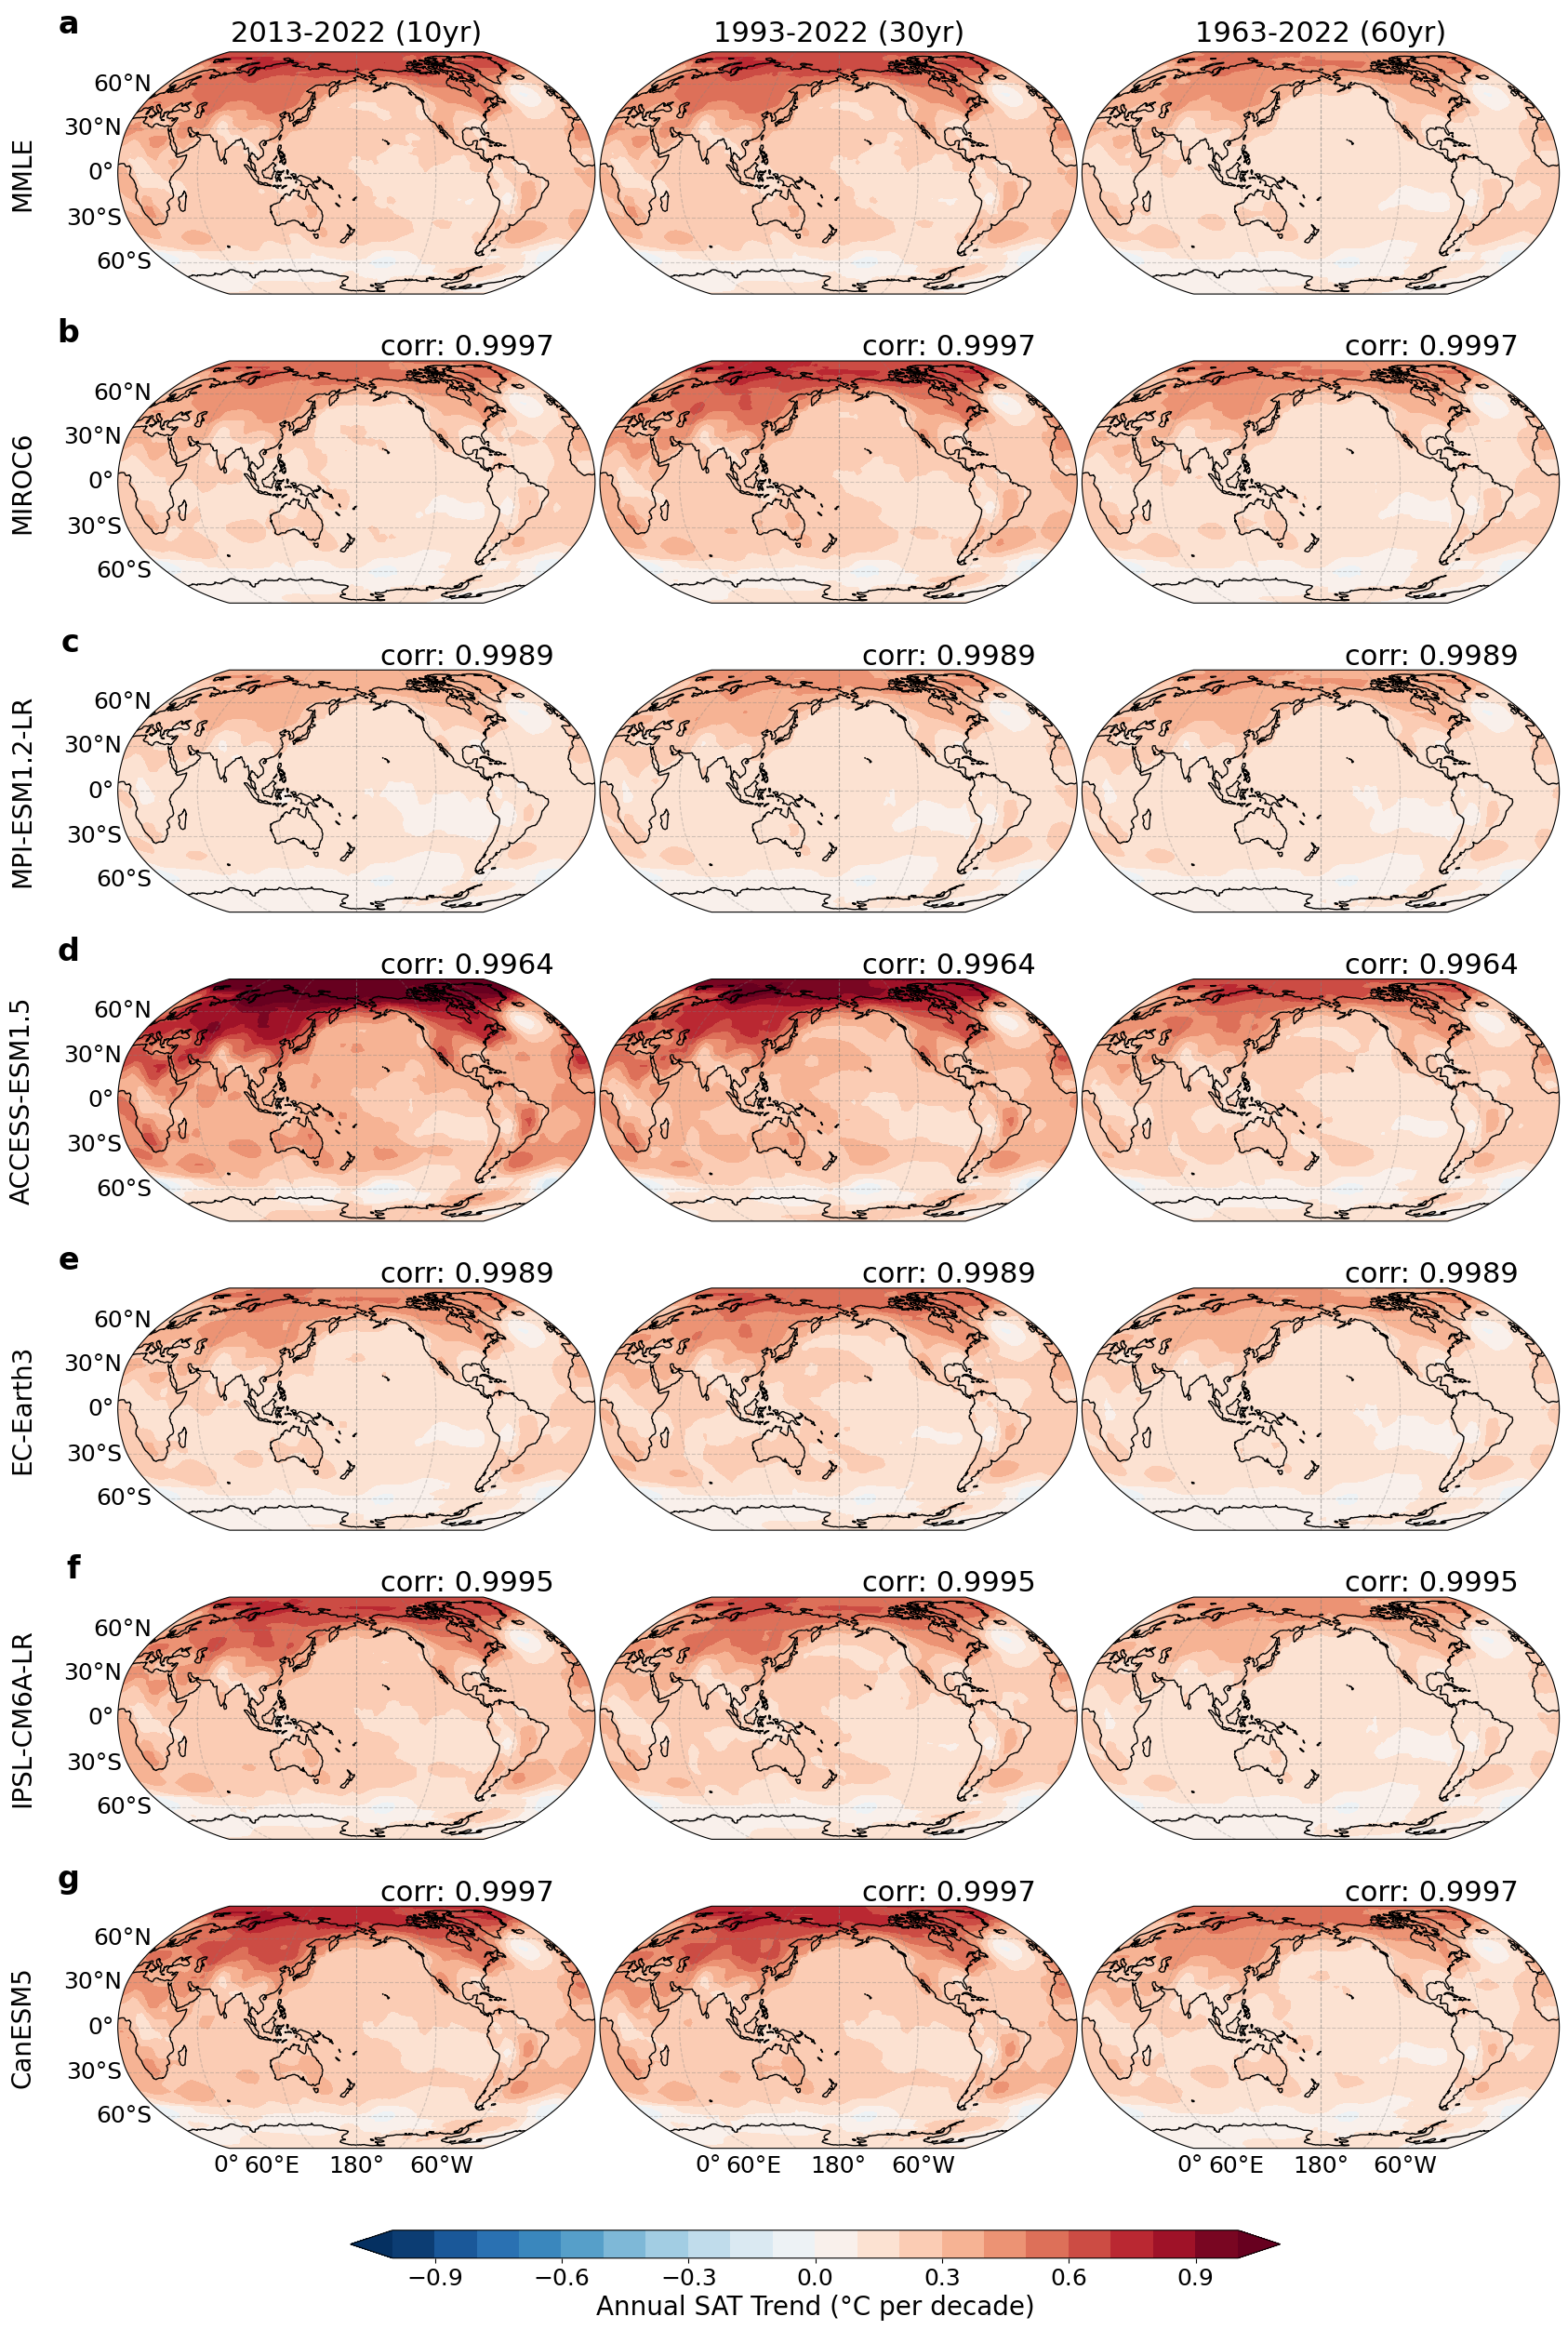

In [24]:
lat = trend_60yr['MMEM'].lat
lon = trend_60yr['MMEM'].lon
lat, lon 

titles_rows = ["MMLE", "MIROC6", "MPI-ESM1.2-LR","ACCESS-ESM1.5", "EC-Earth3", "IPSL-CM6A-LR", "CanESM5"]
rows_label = ["a", "b", "c", "d", "e", "f", "g"]
titles_columns = ["2013-2022 (10yr)", "1993-2022 (30yr)", "1963-2022 (60yr)"]

# Define the GridSpec
"""
with each column representing a different period and each row representing a different models
"""
fig = plt.figure(figsize=(20, 30)) 
gs = gridspec.GridSpec(7, 3, figure=fig, wspace=0.01, hspace=0.05)

periods = ["10yr", "30yr", "60yr"]
extend = 'both'
levels = np.arange(-1.0, 1.1, 0.1)

axes = {}
for i, var in enumerate(vars):
    for j, period in enumerate(periods):
        # Define the axes
        is_left = j==0
        is_bottom_row = i>=6
        ax = fig.add_subplot(gs[i, j], projection=ccrs.Robinson(180))
        ax.set_global()
        
        axes[(i,j)]=ax
        if j == 0:
            trend_data = trend_10yr[var]
            p_values = p_value_10yr[var]
            trend_with_cyclic, lon_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, _ = cutil.add_cyclic_point(p_values, coord=lon)
            contour_obj = plot_trend_with_significance(trend_with_cyclic, lat, lon_cyclic, p_values_with_cyclic, 
                                                       levels=levels, extend=extend, cmap='RdBu_r', 
                                                       title=" ", ax=ax, show_xticks=is_bottom_row, show_yticks=is_left)
        elif j == 1:
            trend_data = trend_30yr[var]
            p_values = p_value_30yr[var]
            trend_with_cyclic, lon_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, _ = cutil.add_cyclic_point(p_values, coord=lon)
            contour_obj1 = plot_trend_with_significance(trend_with_cyclic, lat, lon_cyclic, p_values_with_cyclic, 
                                                       levels=levels, extend=extend, cmap='RdBu_r', 
                                                       title=" ", ax=ax, show_xticks=is_bottom_row, show_yticks=False)
        else:
            trend_data = trend_60yr[var]
            p_values = p_value_60yr[var]
            trend_with_cyclic, lon_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, _ = cutil.add_cyclic_point(p_values, coord=lon)
            contour_obj2 = plot_trend_with_significance(trend_with_cyclic, lat, lon_cyclic, p_values_with_cyclic, 
                                                       levels=levels, extend=extend, cmap='RdBu_r', 
                                                       title=" ", ax=ax, show_xticks=is_bottom_row, show_yticks=False)
        # if i == 0:
        #     # add the title to the top of the column
        #     ax.set_title(titles_columns[j], loc='center', fontsize=18, pad=5.0)
            
# add the title for each row
for i in range(7):
    axes[i, 0].text(-0.2, 0.5, titles_rows[i], va='center', ha='center', rotation=90, 
                    fontsize=20,transform=axes[i, 0].transAxes)
    axes[i, 0].text(-0.08, 1.05, rows_label[i], va='bottom', ha='right', rotation='horizontal',
                    fontsize=24, fontweight='bold', transform=axes[i, 0].transAxes)
# add the title for each column
for j in range(3):
    axes[0,j].text(0.5, 1.02, titles_columns[j], va='bottom', ha='center', rotation='horizontal', fontsize=22,transform=axes[0, j].transAxes)
    
for i in np.arange(1,7,1):
    axes[i, 0].text(0.55, 1.0, f"corr: {trend_pattern_correlation_10yr[i]:.4f}", va='bottom', ha='left', fontsize=22,transform=axes[i, 0].transAxes)
    axes[i, 1].text(0.55, 1.0, f"corr: {trend_pattern_correlation_30yr[i]:.4f}", va='bottom', ha='left', fontsize=22,transform=axes[i, 1].transAxes)
    axes[i, 2].text(0.55, 1.0, f"corr: {trend_pattern_correlation_60yr[i]:.4f}", va='bottom', ha='left', fontsize=22,transform=axes[i, 2].transAxes)

# Add horizontal colorbars
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.01])
cbar = plt.colorbar(contour_obj, cax=cbar_ax, orientation='horizontal', extend=extend)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Annual SAT Trend (°C per decade)', fontsize=20)

plt.tight_layout()
fig.savefig('Extended_Fig5_forced_pattern.png', dpi=300, bbox_inches='tight')
fig.savefig('Extended_Fig5_forced_pattern.pdf', dpi=300, bbox_inches='tight')
fig.savefig('Extended_Fig5_forced_pattern.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()